<a href="https://colab.research.google.com/github/Mahadevan0507/INDIA_General_Election_2024_Analysis/blob/main/INDIA_General_Election_2024_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lok-sabha-general-election-2024-results-india:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5178260%2F8645994%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240712%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240712T151906Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4dd6f478b4583fe52d0be3e584862f633c2e20ca309b37169932beebc0d9b3ecbfabe1a7c2b567c5c00d93cb08810bd91638915778234b3091264367474f735a8323454870515f3d426fc9dd164529490f228eda45165ae53a87a6e78e09dd24de08aa5f3598afaca2f8400e55d955d559176c2a904f18ff0208a2cba47b2f1e0d87c6f6ce858215b96d54d057c1ff8bb96456604458dfac91b5501b2a1da2dbbf68b55eaaa98cdf9aa1c62908868d86bb92b1c426b2681c4c92d594f57cd118519af8611ea2fb324732b708810d844043031f3f3e9b21c84ab796ac3770f5bb53b19edc66355e32d979b6597d90bc94a3aba1fff91b3db3a21ea14b098a30b7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 224691 bytes downloaded
Downloaded and uncompressed: lok-sabha-general-election-2024-results-india
Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('/kaggle/input/lok-sabha-general-election-2024-results-india/GE_2024_Results.csv')

df.head()

,ID,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,Result
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Won
1,2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Lost
2,3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Lost
3,4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Lost
4,5,Andaman & Nicobar Islands,Andaman & Nicobar Islands,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Lost


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            8902 non-null   int64 
 1   State         8902 non-null   object
 2   Constituency  8902 non-null   object
 3   Candidate     8902 non-null   object
 4   Party         8902 non-null   object
 5   EVM Votes     8902 non-null   object
 6   Postal Votes  8902 non-null   object
 7   Total Votes   8902 non-null   int64 
 8   % of Votes    8902 non-null   object
 9   Result        8902 non-null   object
dtypes: int64(2), object(8)
memory usage: 695.6+ KB


In [5]:
df['EVM Votes'] = df['EVM Votes'].str.replace('-', '0')
df['Postal Votes'] = df['Postal Votes'].str.replace('-', '0')
df['% of Votes'] = df['% of Votes'].str.replace('-', '0')

df[['Postal Votes', 'EVM Votes']] = df[['Postal Votes', 'EVM Votes']].astype(int)
df['% of Votes'] = df['% of Votes'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8902 non-null   int64  
 1   State         8902 non-null   object 
 2   Constituency  8902 non-null   object 
 3   Candidate     8902 non-null   object 
 4   Party         8902 non-null   object 
 5   EVM Votes     8902 non-null   int64  
 6   Postal Votes  8902 non-null   int64  
 7   Total Votes   8902 non-null   int64  
 8   % of Votes    8902 non-null   float64
 9   Result        8902 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 695.6+ KB


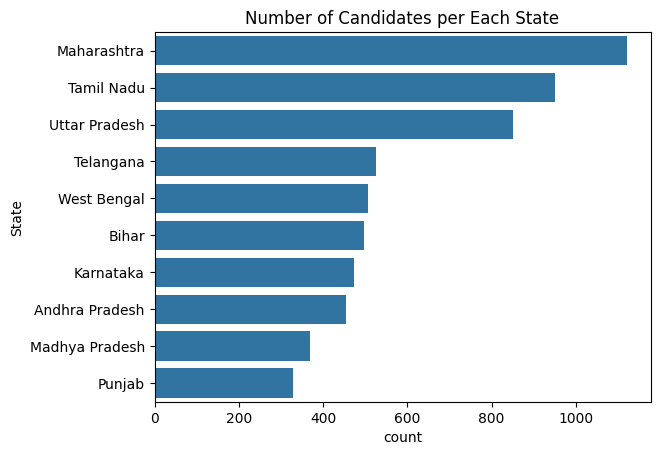

In [6]:
candidates_per_state = df[df['Candidate'] != 'NOTA'].value_counts('State').head(10)

plt.title('Number of Candidates per Each State')
sns.barplot(x=candidates_per_state, y=candidates_per_state.index)
plt.show()

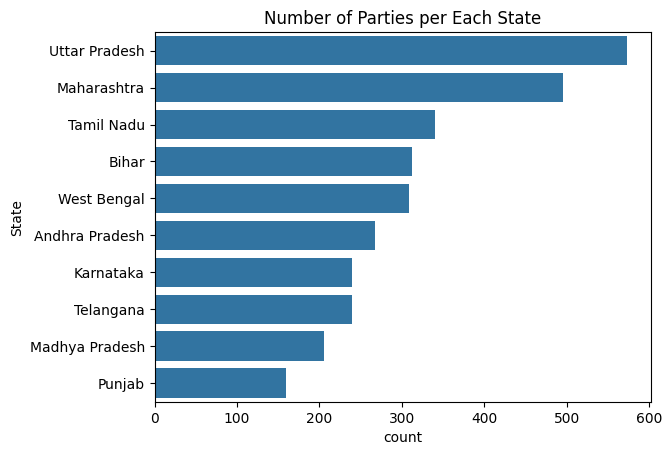

In [7]:
parties_per_state = df[~df['Party'].isin(['None of the Above', 'Independent'])].value_counts('State').head(10)

plt.title('Number of Parties per Each State')
sns.barplot(x=parties_per_state, y=parties_per_state.index)
plt.show()

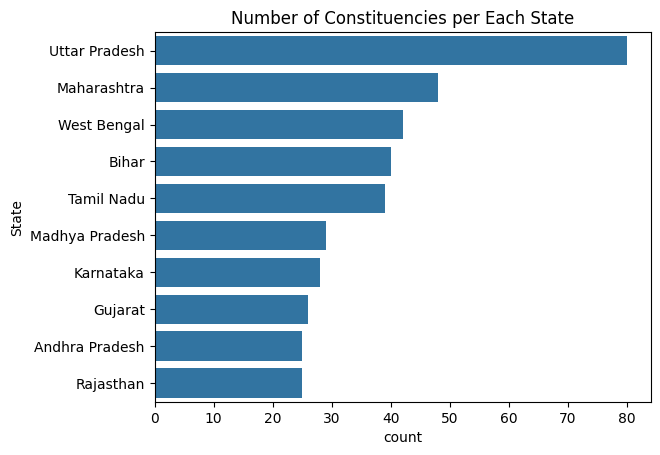

In [8]:
constituencies_per_state = df[['State', 'Constituency']].drop_duplicates().value_counts('State').head(10)

plt.title('Number of Constituencies per Each State')
sns.barplot(x=constituencies_per_state, y=constituencies_per_state.index)
plt.show()

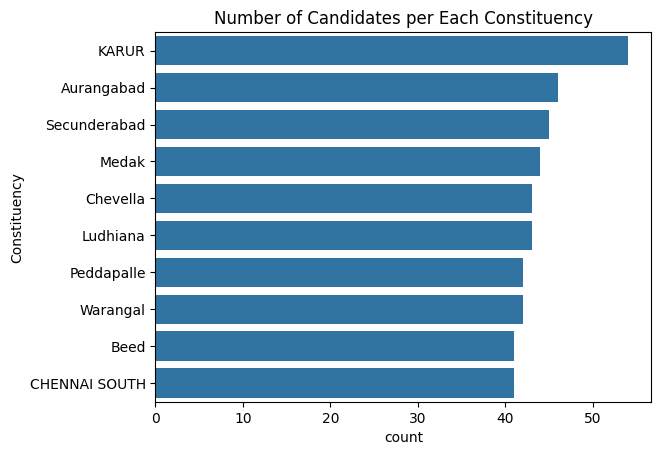

In [9]:
candidates_per_constituency = df[df['Candidate'] != 'NOTA'].value_counts('Constituency').head(10)

plt.title('Number of Candidates per Each Constituency')
sns.barplot(x=candidates_per_constituency, y=candidates_per_constituency.index)
plt.show()

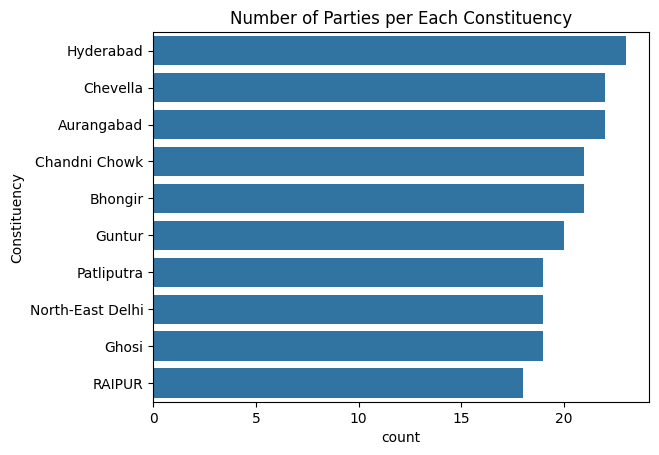

In [10]:
parties_per_constituency = df[~df['Party'].isin(['None of the Above', 'Independent'])].value_counts('Constituency').head(10)

plt.title('Number of Parties per Each Constituency')
sns.barplot(x=parties_per_constituency, y=parties_per_constituency.index)
plt.show()

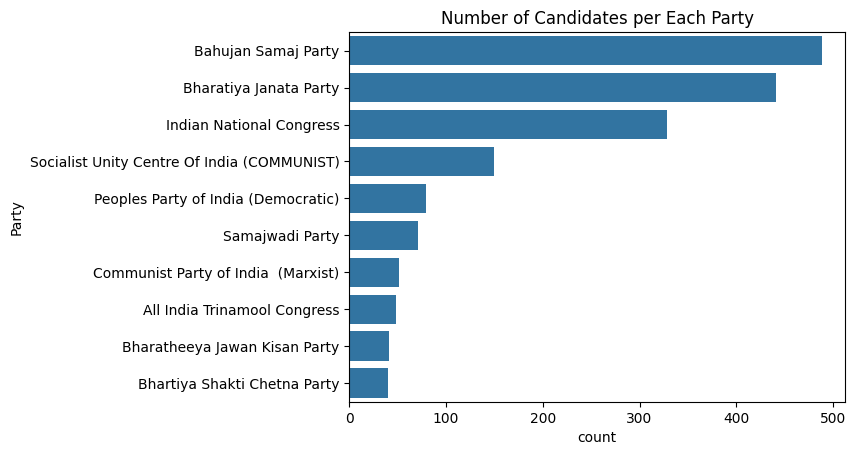

In [11]:
candidates_per_party = df[(df['Candidate'] != 'NOTA') & (df['Party'] != 'Independent')].value_counts('Party').head(10)

plt.title('Number of Candidates per Each Party')
sns.barplot(x=candidates_per_party, y=candidates_per_party.index)
plt.show()

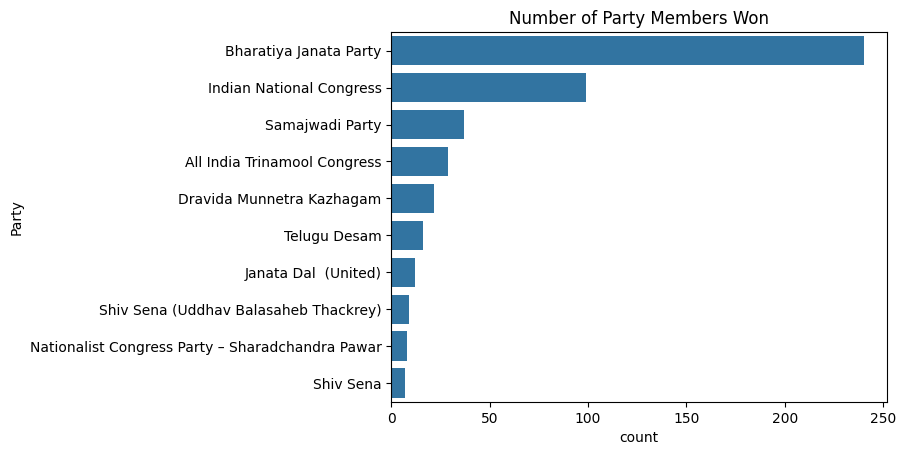

In [12]:
party_wins = df[df['Result'] == 'Won'].value_counts('Party').head(10)

plt.title('Number of Party Members Won')
sns.barplot(x=party_wins, y=party_wins.index)
plt.show()

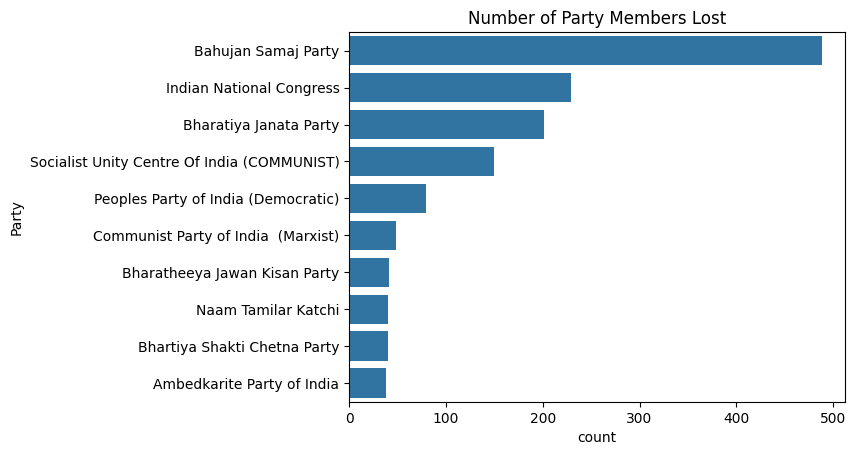

In [13]:
party_loss = df[(df['Result'] == 'Lost') & ~(df['Party'].isin(['Independent', 'None of the Above']))].value_counts('Party').head(10)

plt.title('Number of Party Members Lost')
sns.barplot(x=party_loss, y=party_loss.index)
plt.show()

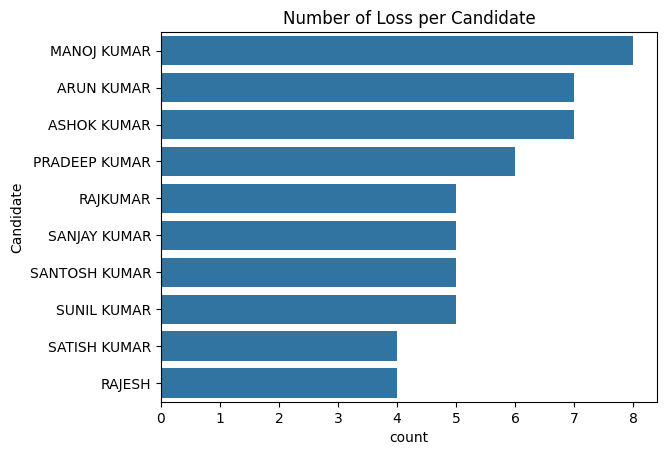

In [14]:
candidate_loss = df[(df['Result'] == 'Lost') & (df['Candidate'] != 'NOTA')].value_counts('Candidate').head(10)

plt.title('Number of Loss per Candidate')
sns.barplot(x=candidate_loss, y=candidate_loss.index)
plt.show()

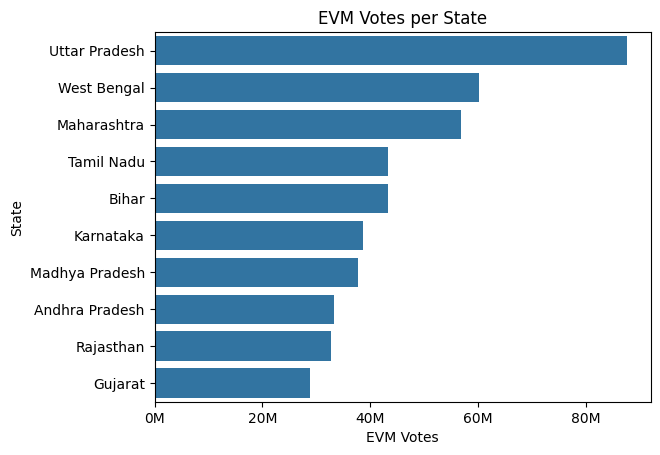

In [15]:
evm_votes_per_state = df.groupby('State')['EVM Votes'].sum()
evm_votes_per_state = evm_votes_per_state.sort_values(ascending=False).head(10)

plt.title('EVM Votes per State')
sns.barplot(x=evm_votes_per_state, y=evm_votes_per_state.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000)))
plt.show()

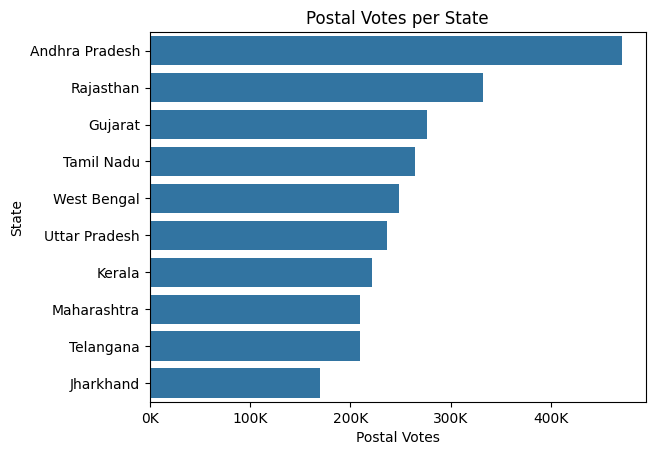

In [16]:
postal_votes_per_state = df.groupby('State')['Postal Votes'].sum()
postal_votes_per_state = postal_votes_per_state.sort_values(ascending=False).head(10)

plt.title('Postal Votes per State')
sns.barplot(x=postal_votes_per_state, y=postal_votes_per_state.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

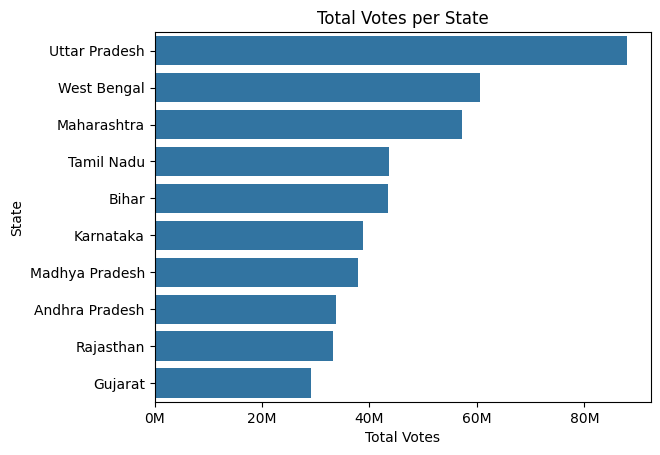

In [17]:
total_votes_per_state = df.groupby('State')['Total Votes'].sum()
total_votes_per_state = total_votes_per_state.sort_values(ascending=False).head(10)

plt.title('Total Votes per State')
sns.barplot(x=total_votes_per_state, y=total_votes_per_state.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000)))
plt.show()

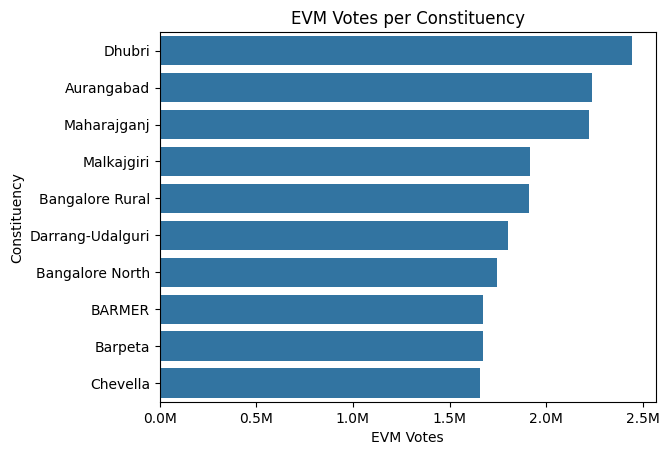

In [18]:
evm_votes_per_constituency = df.groupby('Constituency')['EVM Votes'].sum()
evm_votes_per_constituency = evm_votes_per_constituency.sort_values(ascending=False).head(10)

plt.title('EVM Votes per Constituency')
sns.barplot(x=evm_votes_per_constituency, y=evm_votes_per_constituency.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000)))
plt.show()

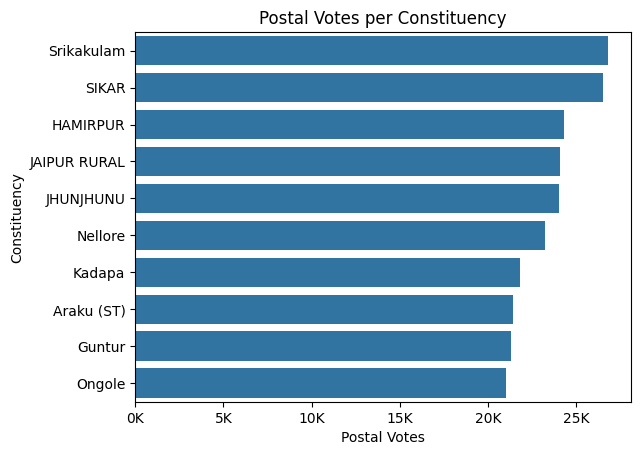

In [19]:
postal_votes_per_constituency = df.groupby('Constituency')['Postal Votes'].sum()
postal_votes_per_constituency = postal_votes_per_constituency.sort_values(ascending=False).head(10)

plt.title('Postal Votes per Constituency')
sns.barplot(x=postal_votes_per_constituency, y=postal_votes_per_constituency.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

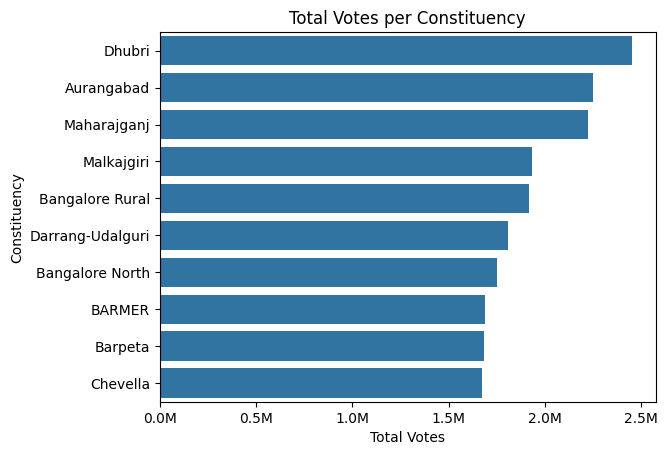

In [20]:
total_votes_per_constituency = df.groupby('Constituency')['Total Votes'].sum()
total_votes_per_constituency = total_votes_per_constituency.sort_values(ascending=False).head(10)

plt.title('Total Votes per Constituency')
sns.barplot(x=total_votes_per_constituency, y=total_votes_per_constituency.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000)))
plt.show()

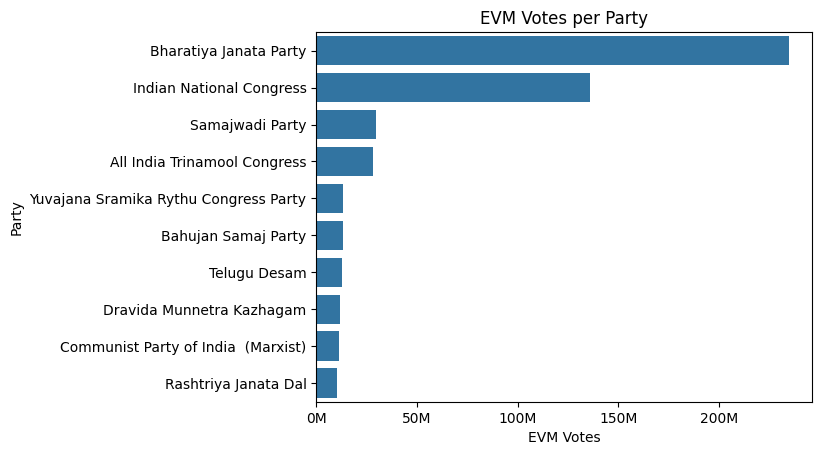

In [21]:
evm_votes_per_party = df[~df['Party'].isin(['Independent', 'None of the Above'])].groupby('Party')['EVM Votes'].sum()
evm_votes_per_party = evm_votes_per_party.sort_values(ascending=False).head(10)

plt.title('EVM Votes per Party')
sns.barplot(x=evm_votes_per_party, y=evm_votes_per_party.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000)))
plt.show()

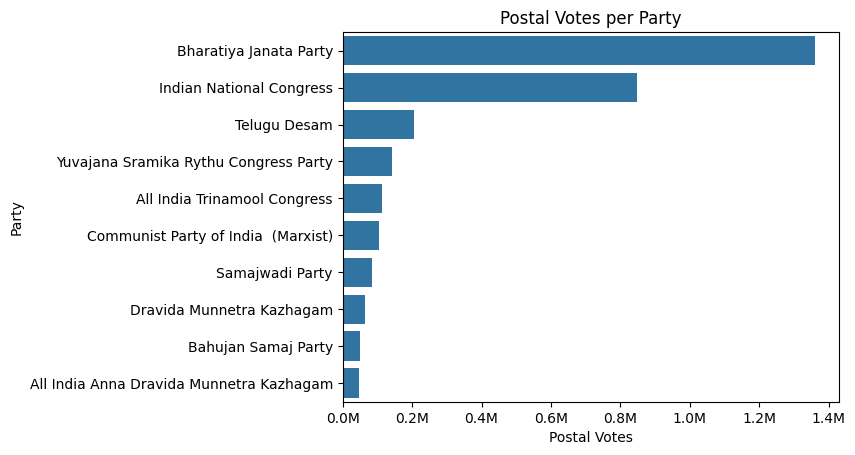

In [22]:
postal_votes_per_party = df[~df['Party'].isin(['Independent', 'None of the Above'])].groupby('Party')['Postal Votes'].sum()
postal_votes_per_party = postal_votes_per_party.sort_values(ascending=False).head(10)

plt.title('Postal Votes per Party')
sns.barplot(x=postal_votes_per_party, y=postal_votes_per_party.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1000000)))
plt.show()

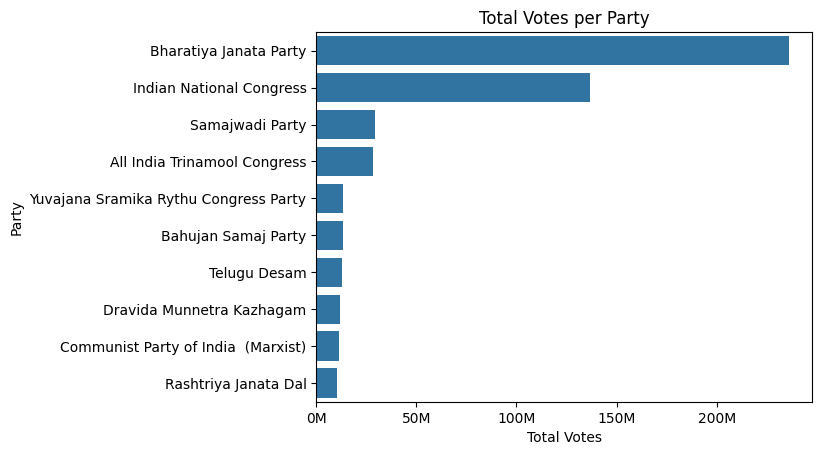

In [23]:
total_votes_per_party = df[~df['Party'].isin(['Independent', 'None of the Above'])].groupby('Party')['Total Votes'].sum()
total_votes_per_party = total_votes_per_party.sort_values(ascending=False).head(10)

plt.title('Total Votes per Party')
sns.barplot(x=total_votes_per_party, y=total_votes_per_party.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1000000)))
plt.show()

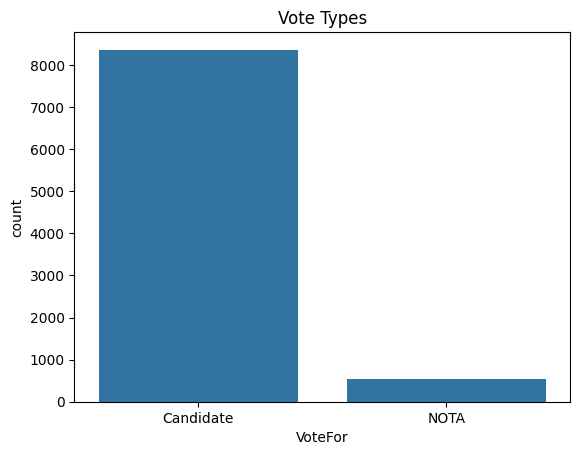

In [24]:
df['VoteFor'] = df['Candidate'].apply(lambda x: 'Candidate' if x != 'NOTA' else x)

vote_types = df.value_counts('VoteFor')

plt.title('Vote Types')
sns.barplot(x=vote_types.index, y=vote_types)
plt.show()

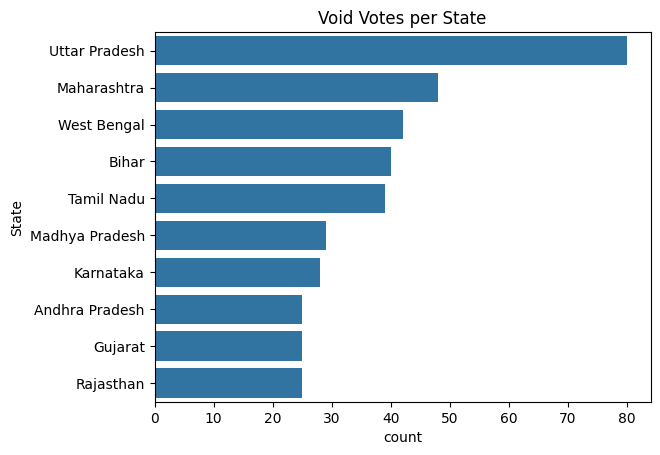

In [25]:
nota_per_state = df[df['Candidate'] == 'NOTA'].value_counts('State').head(10)

plt.title('Void Votes per State')
sns.barplot(x=nota_per_state, y=nota_per_state.index)
plt.show()

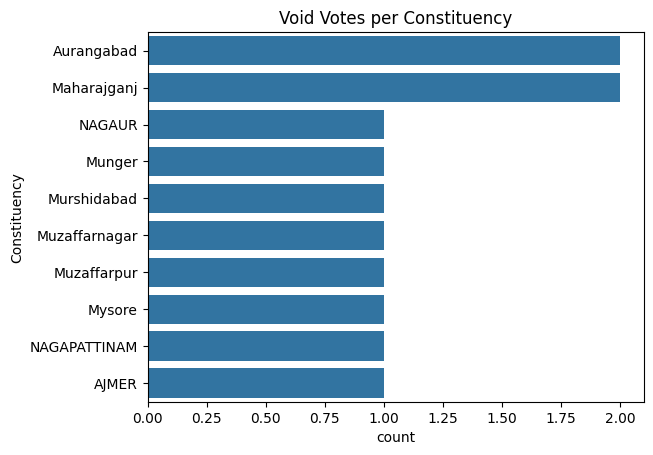

In [26]:
nota_per_constituency = df[df['Candidate'] == 'NOTA'].value_counts('Constituency').head(10)

plt.title('Void Votes per Constituency')
sns.barplot(x=nota_per_constituency, y=nota_per_constituency.index)
plt.show()

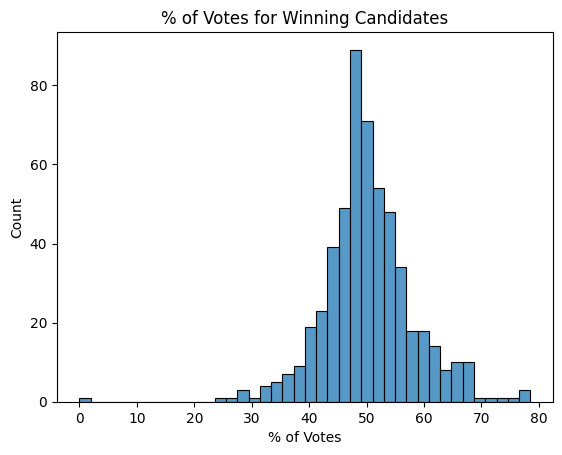

In [28]:
winners_perc = df[df['Result'] == 'Won']

plt.title('% of Votes for Winning Candidates')
sns.histplot(winners_perc['% of Votes'])
plt.show()

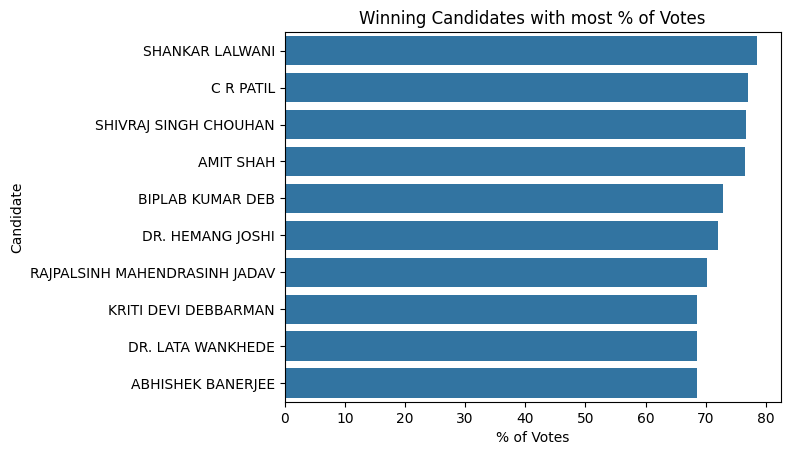

In [29]:
winners_perc = winners_perc.sort_values('% of Votes', ascending=False).head(10)

plt.title('Winning Candidates with most % of Votes')
sns.barplot(x='% of Votes', y='Candidate', data=winners_perc)
plt.show()

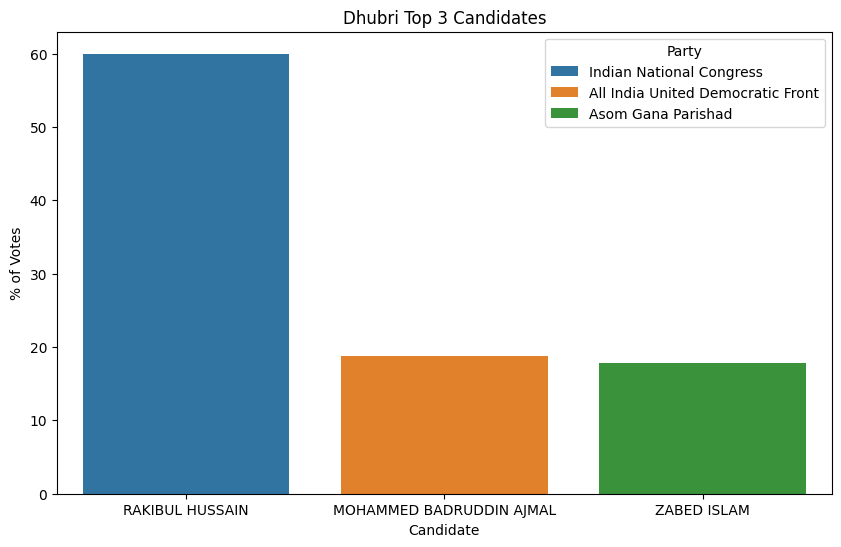

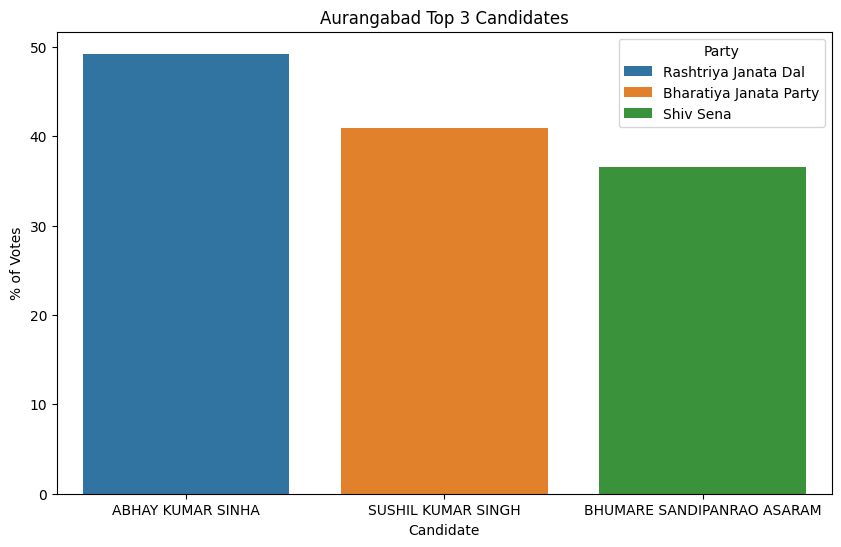

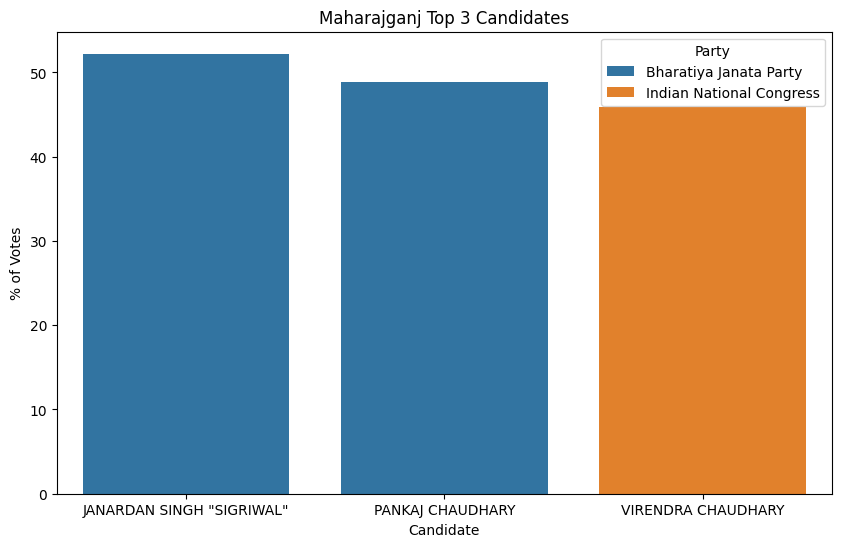

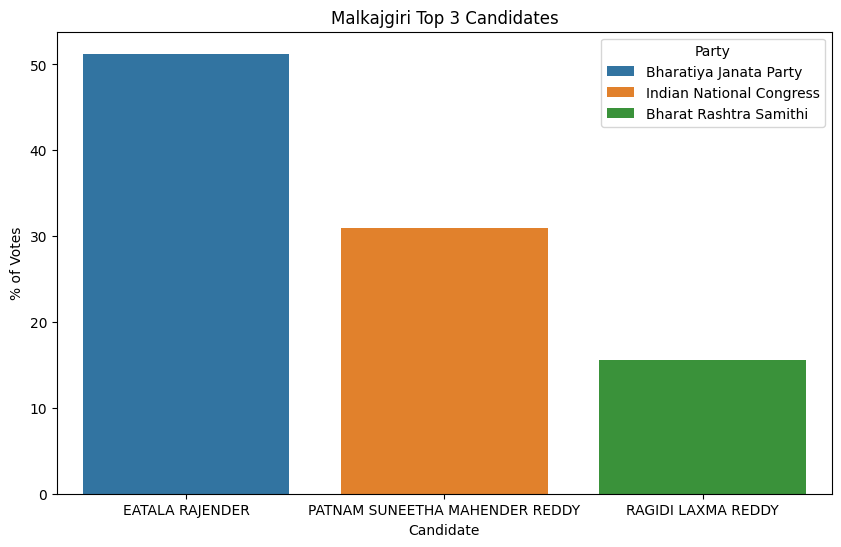

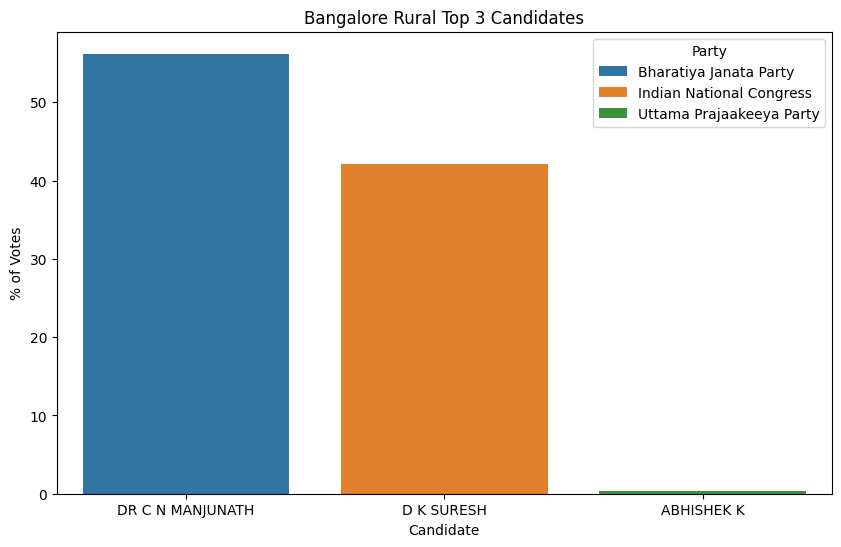

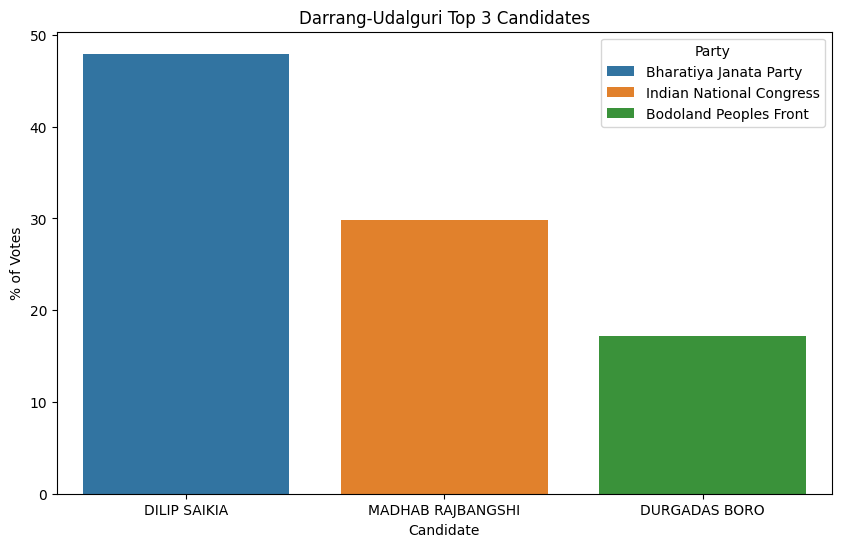

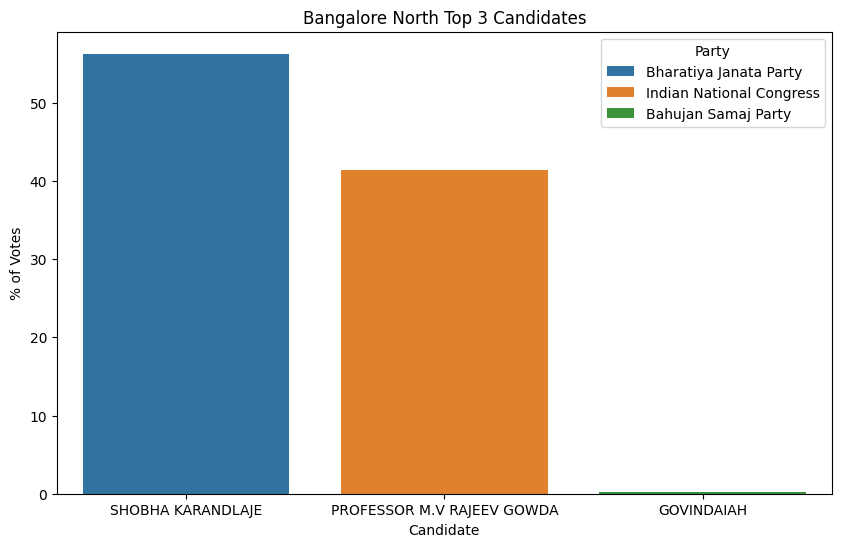

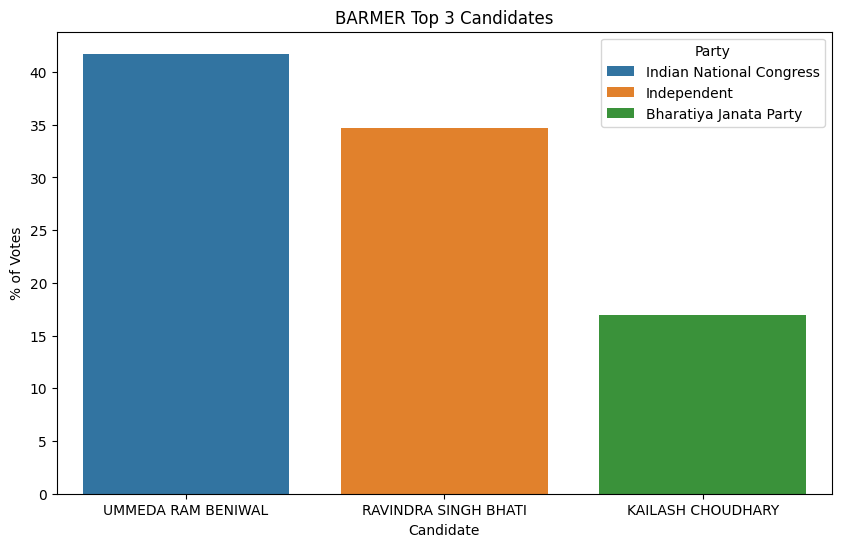

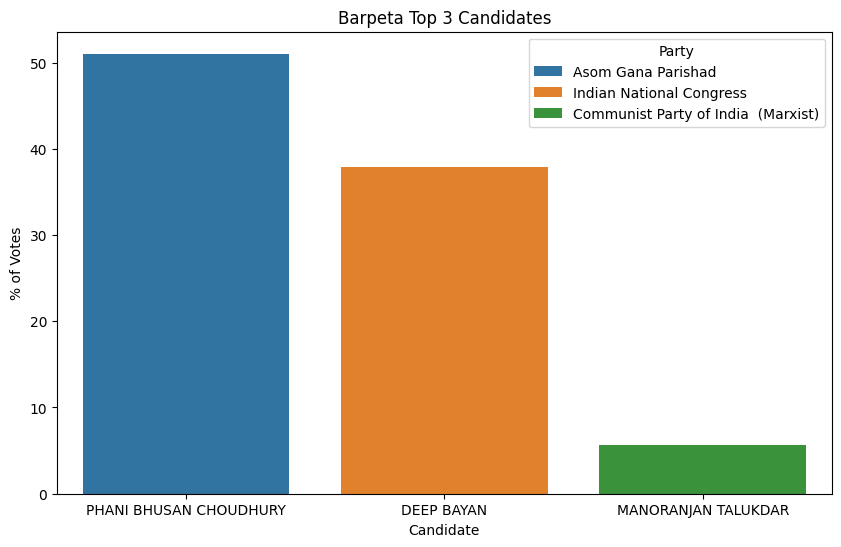

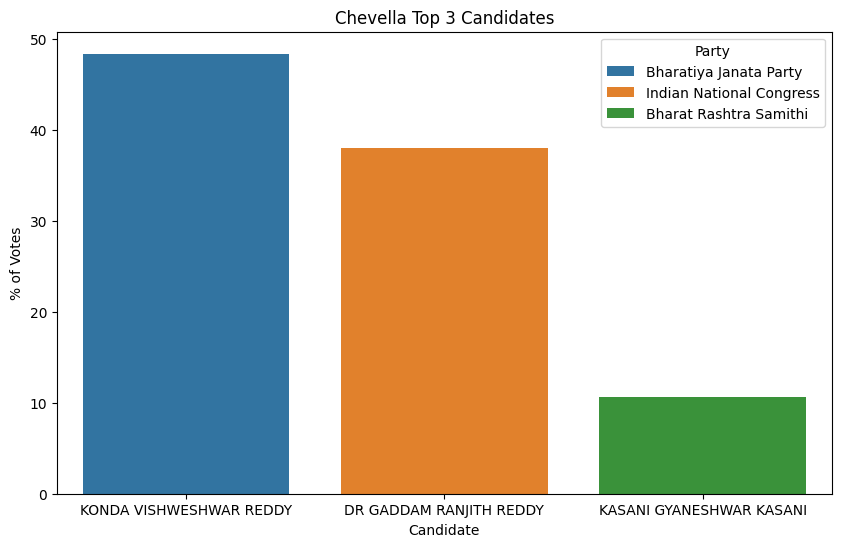

In [30]:
constituencies = total_votes_per_constituency.index

for constituency in constituencies:
    row = df[(df['Constituency'] == constituency) & (df['Candidate'] != 'NOTA')].sort_values('% of Votes', ascending=False).head(3)
    plt.figure(figsize=(10,6))
    plt.title(f"{constituency} Top 3 Candidates")
    sns.barplot(x='Candidate', y='% of Votes', hue='Party', data=row)
    plt.show()

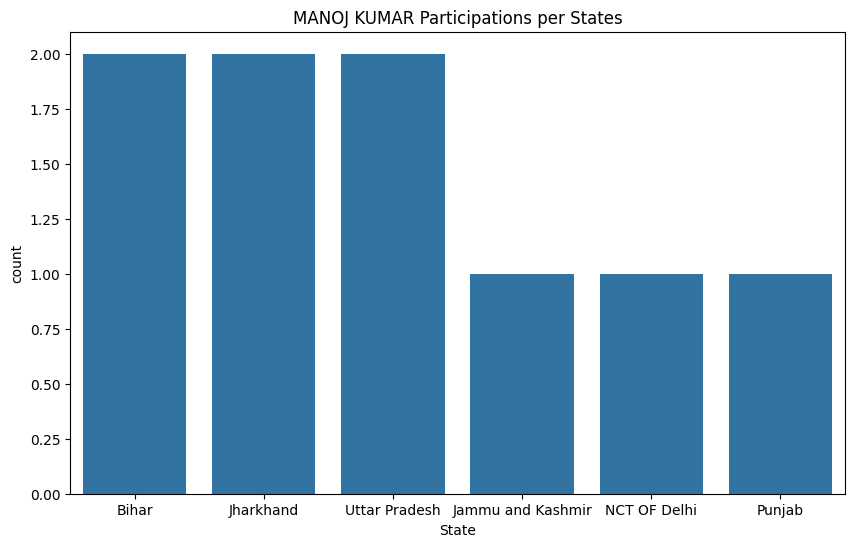

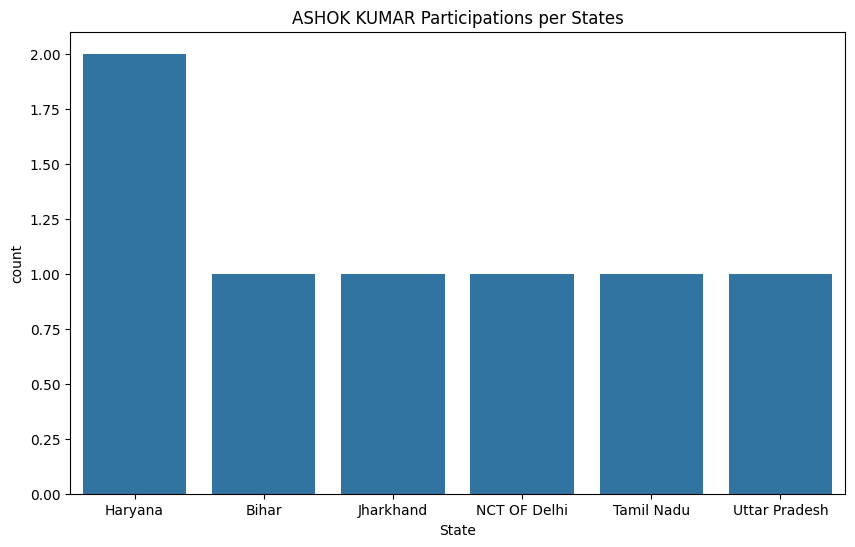

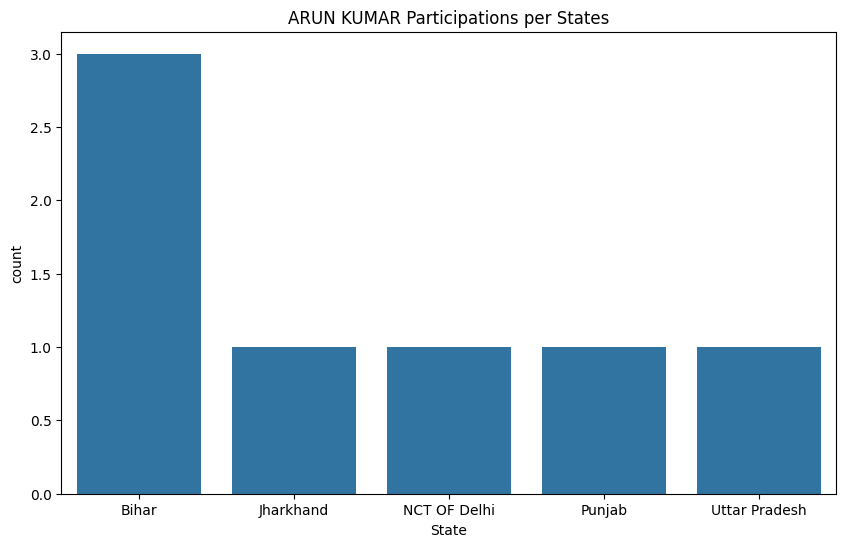

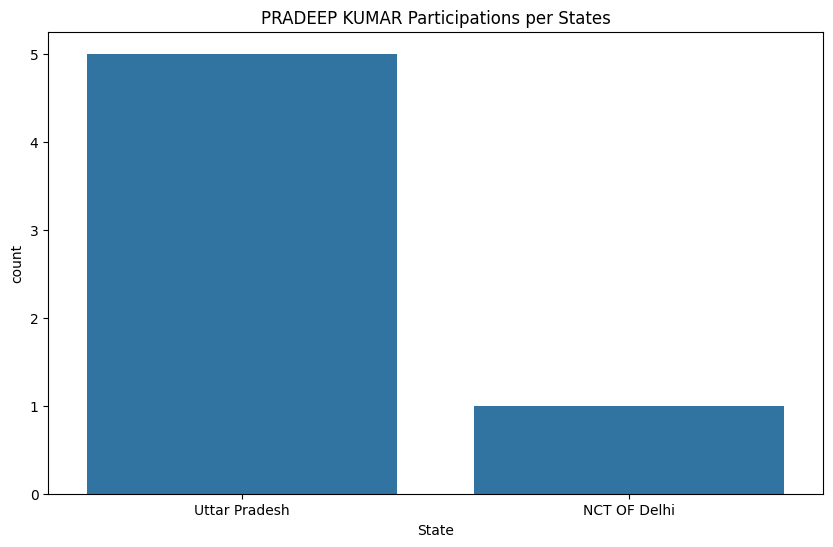

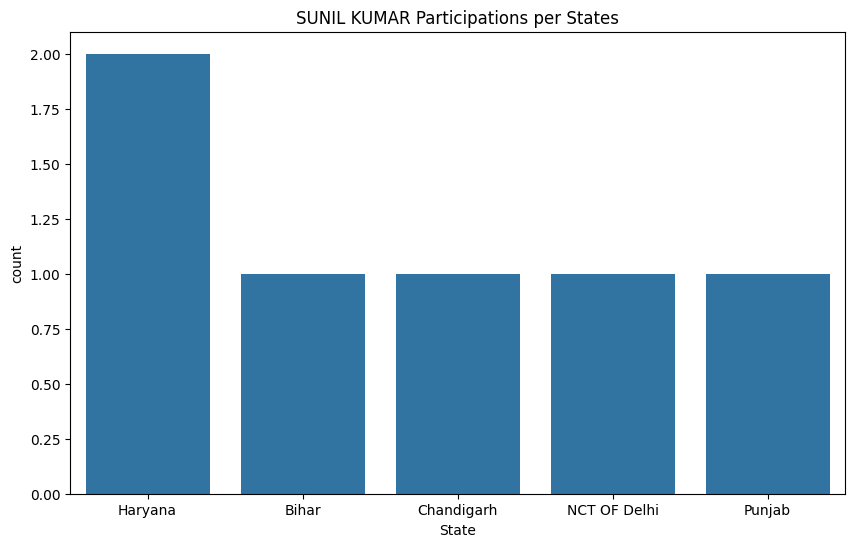

In [31]:
multiple_candidates = df[df['Candidate'] != 'NOTA'].value_counts('Candidate').head()

for candidate in multiple_candidates.index:
    row = df[df['Candidate'] == candidate].value_counts('State')
    plt.figure(figsize=(10,6))
    plt.title(f"{candidate} Participations per States")
    sns.barplot(x=row.index, y=row)
    plt.show()

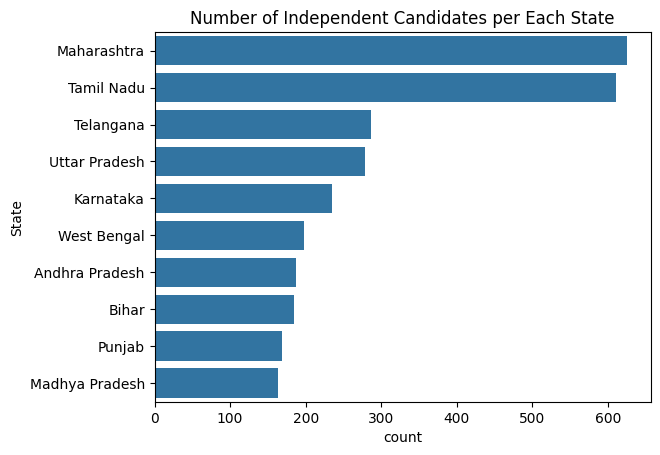

In [32]:
independent_candidates = df[df['Party'] == 'Independent']

independent_candidates_per_state = independent_candidates.value_counts('State').head(10)

plt.title('Number of Independent Candidates per Each State')
sns.barplot(x=independent_candidates_per_state, y=independent_candidates_per_state.index)
plt.show()

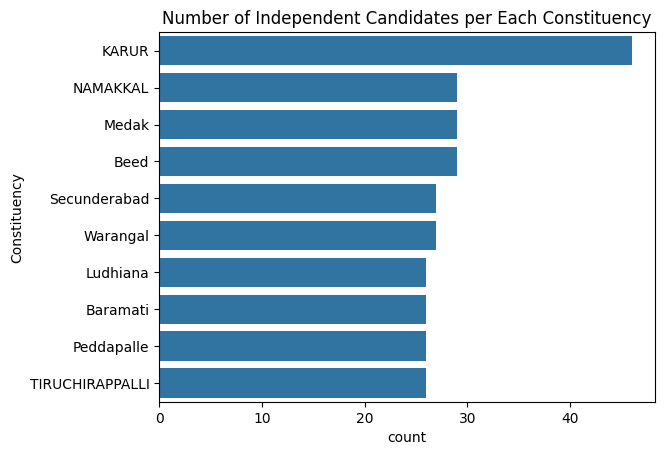

In [33]:
independent_candidates_per_constituency = independent_candidates.value_counts('Constituency').head(10)

plt.title('Number of Independent Candidates per Each Constituency')
sns.barplot(x=independent_candidates_per_constituency, y=independent_candidates_per_constituency.index)
plt.show()

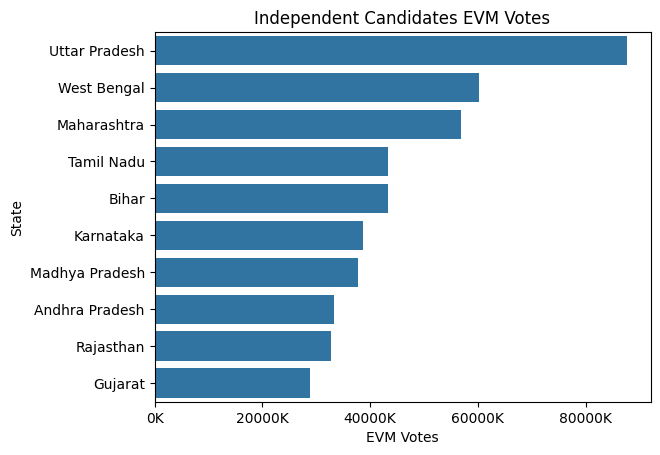

In [34]:
independent_candidates_evm_votes = independent_candidates.groupby('Candidate')['EVM Votes'].sum()
independent_candidates_evm_votes = evm_votes_per_state.sort_values(ascending=False).head(10)

plt.title('Independent Candidates EVM Votes')
sns.barplot(x=independent_candidates_evm_votes, y=independent_candidates_evm_votes.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

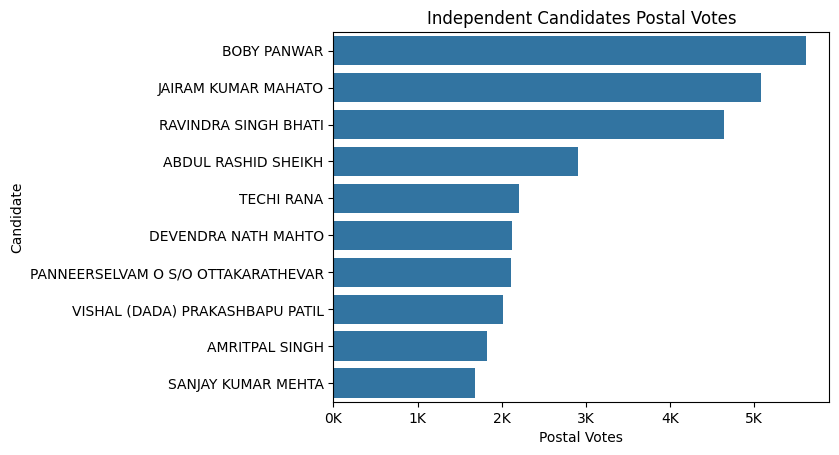

In [35]:
independent_candidates_postal_votes = independent_candidates.groupby('Candidate')['Postal Votes'].sum()
independent_candidates_postal_votes = independent_candidates_postal_votes.sort_values(ascending=False).head(10)

plt.title('Independent Candidates Postal Votes')
sns.barplot(x=independent_candidates_postal_votes, y=independent_candidates_postal_votes.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

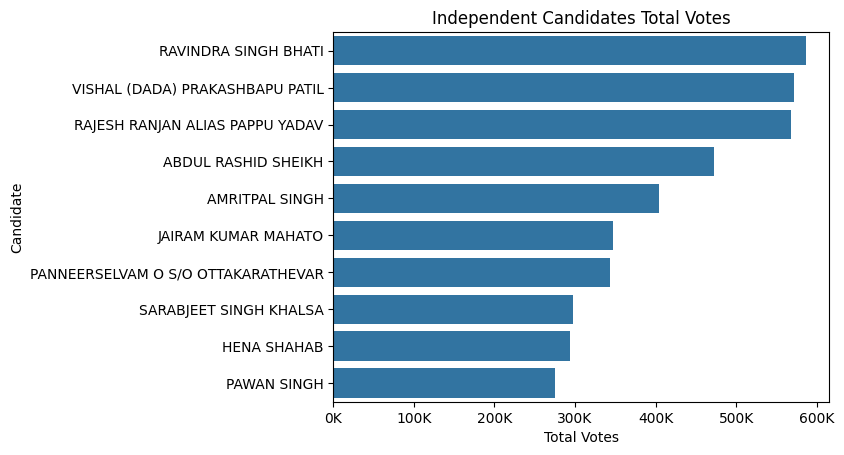

In [36]:
independent_candidates_total_votes = independent_candidates.groupby('Candidate')['Total Votes'].sum()
independent_candidates_total_votes = independent_candidates_total_votes.sort_values(ascending=False).head(10)

plt.title('Independent Candidates Total Votes')
sns.barplot(x=independent_candidates_total_votes, y=independent_candidates_total_votes.index)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000)))
plt.show()

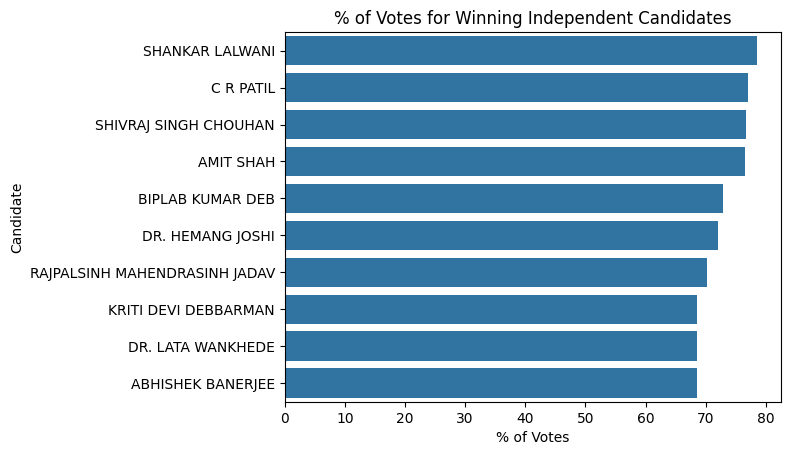

In [37]:
independent_candidates_winners_perc = independent_candidates[independent_candidates['Result'] == 'Won'].sort_values('% of Votes', ascending=False)

plt.title('% of Votes for Winning Independent Candidates')
sns.barplot(x='% of Votes', y='Candidate', data=winners_perc)
plt.show()

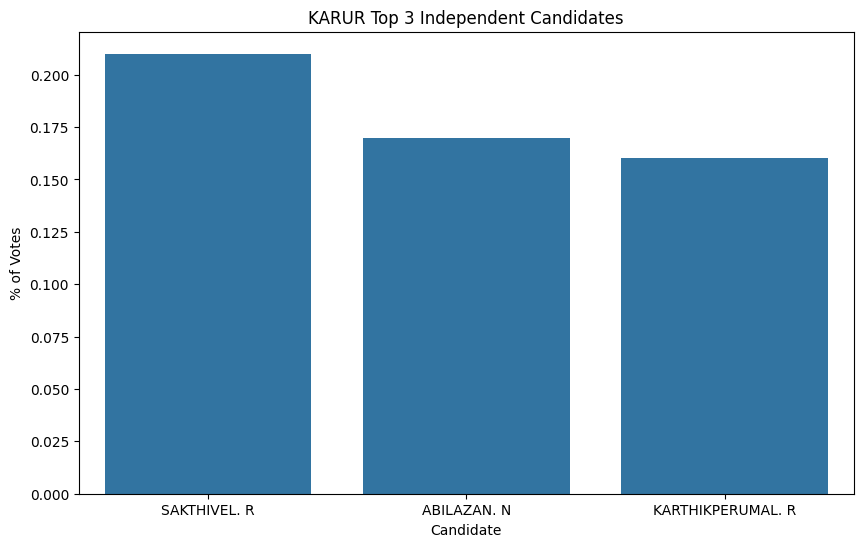

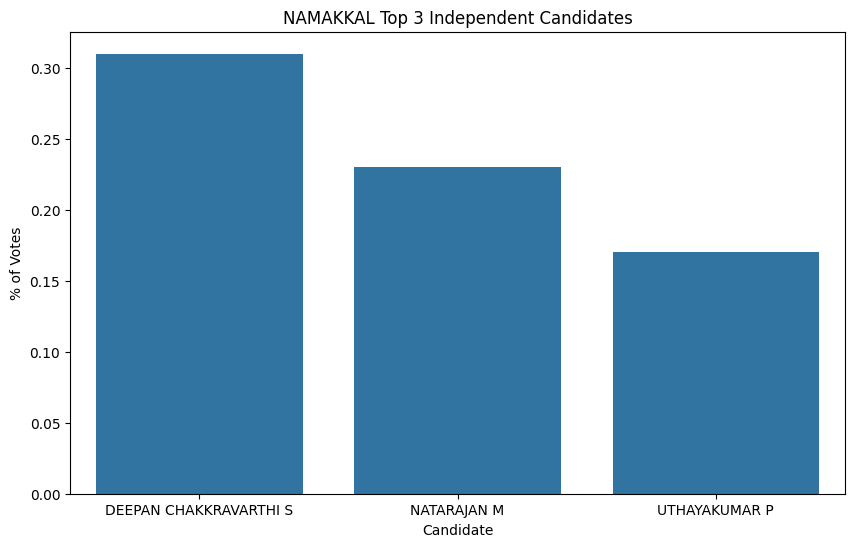

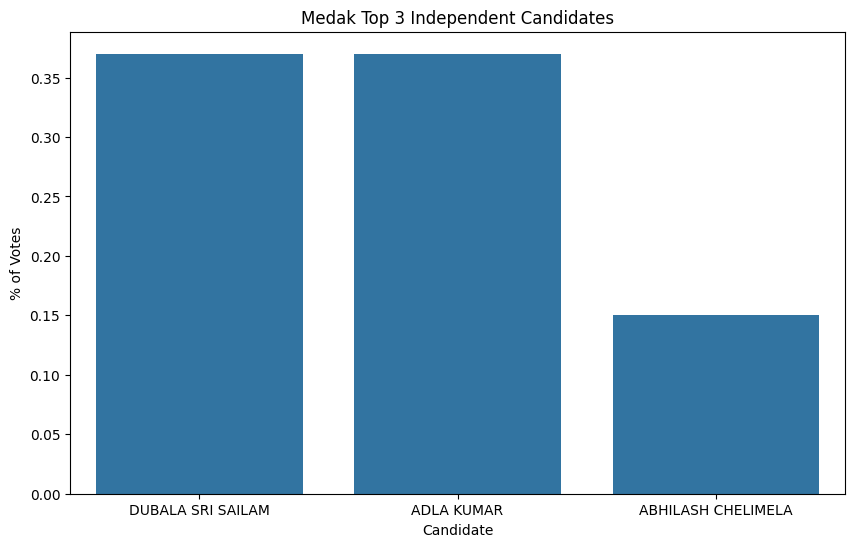

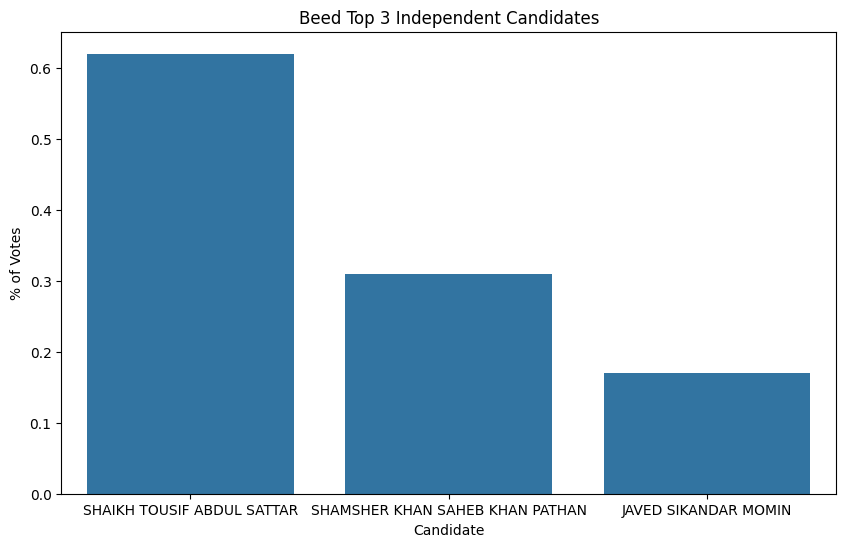

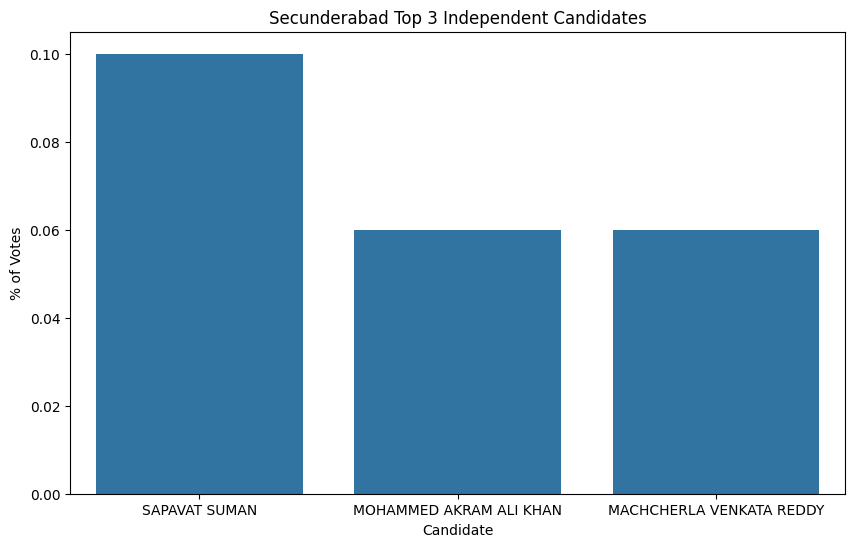

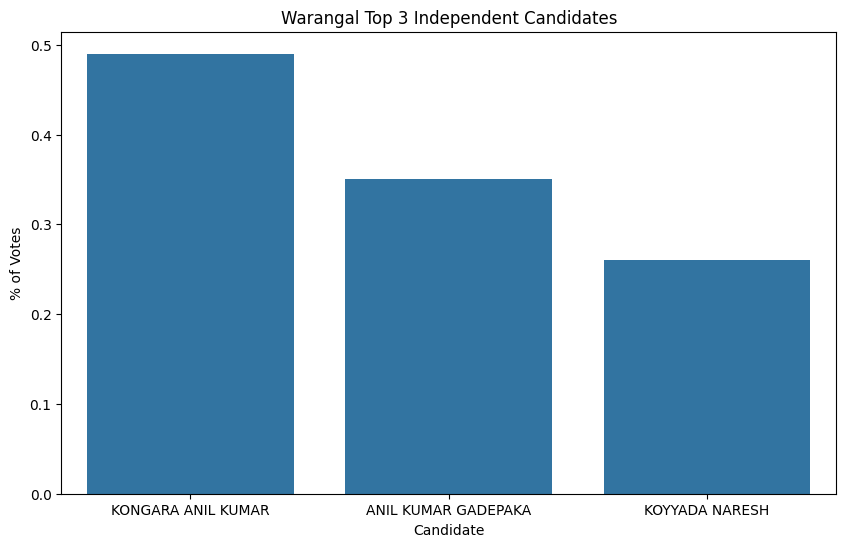

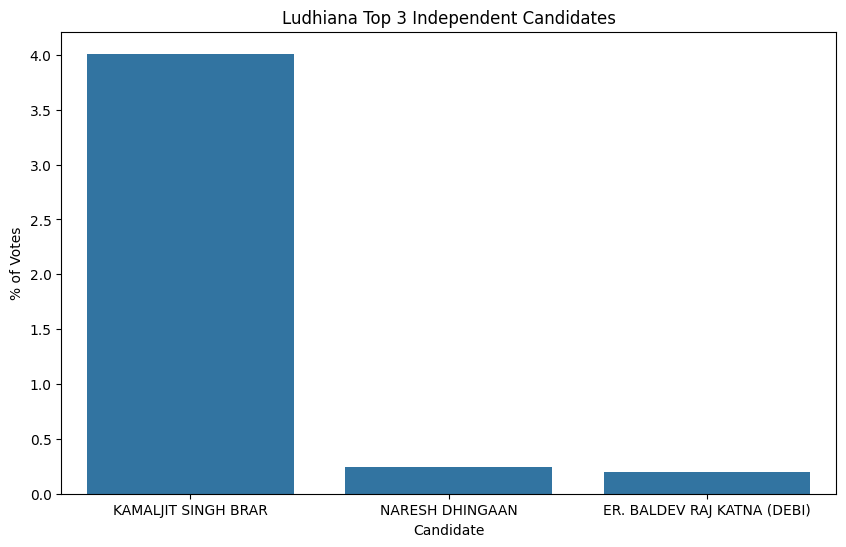

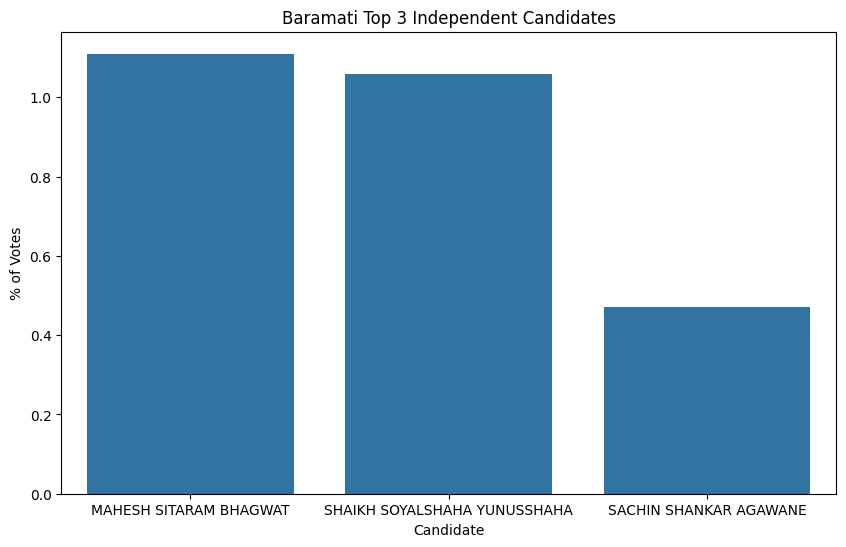

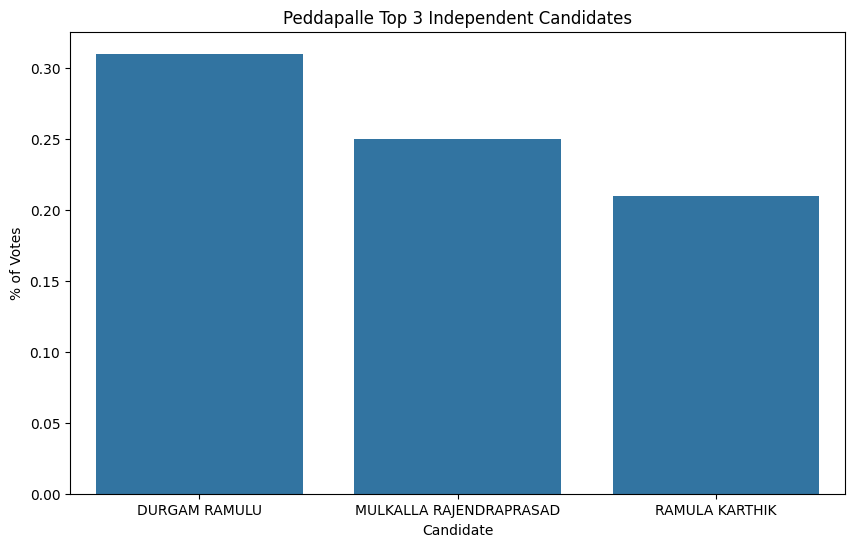

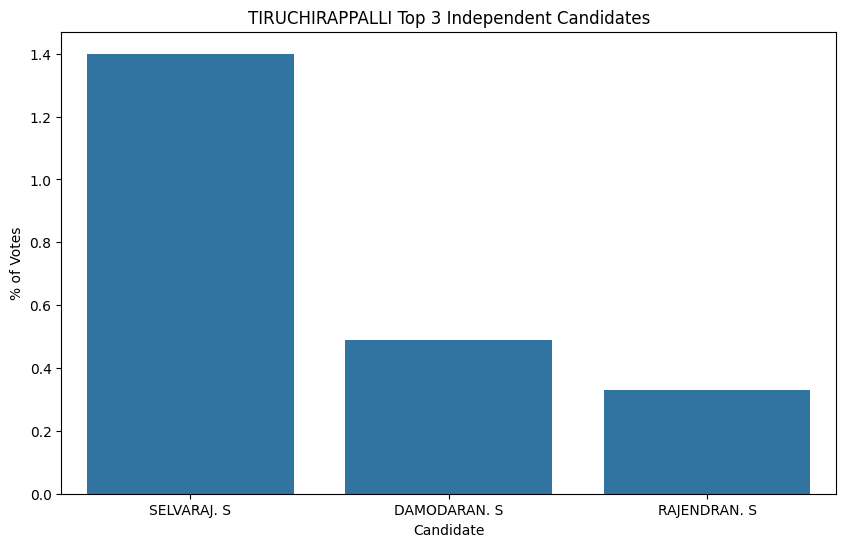

In [38]:
independent_constituencies = independent_candidates_per_constituency.index

for constituency in independent_constituencies:
    row = independent_candidates[independent_candidates['Constituency'] == constituency].sort_values('% of Votes', ascending=False).head(3)
    plt.figure(figsize=(10,6))
    plt.title(f"{constituency} Top 3 Independent Candidates")
    sns.barplot(x='Candidate', y='% of Votes', data=row)
    plt.show()

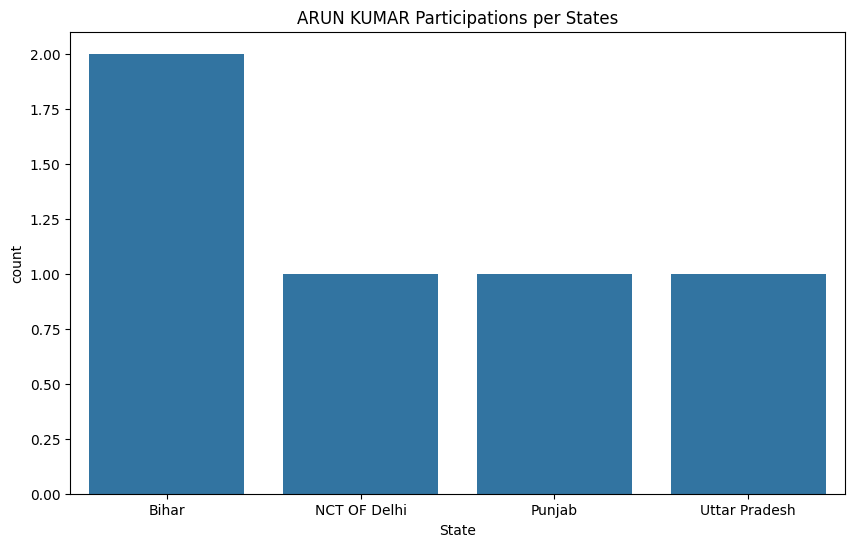

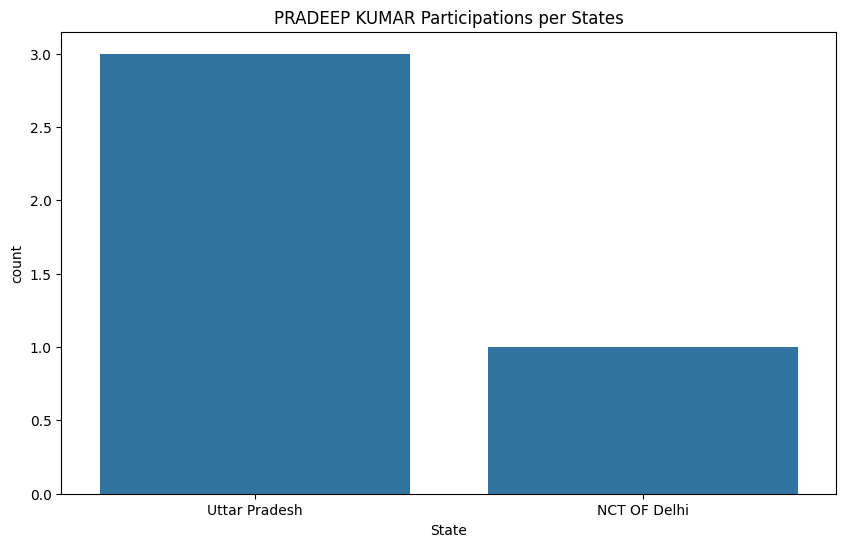

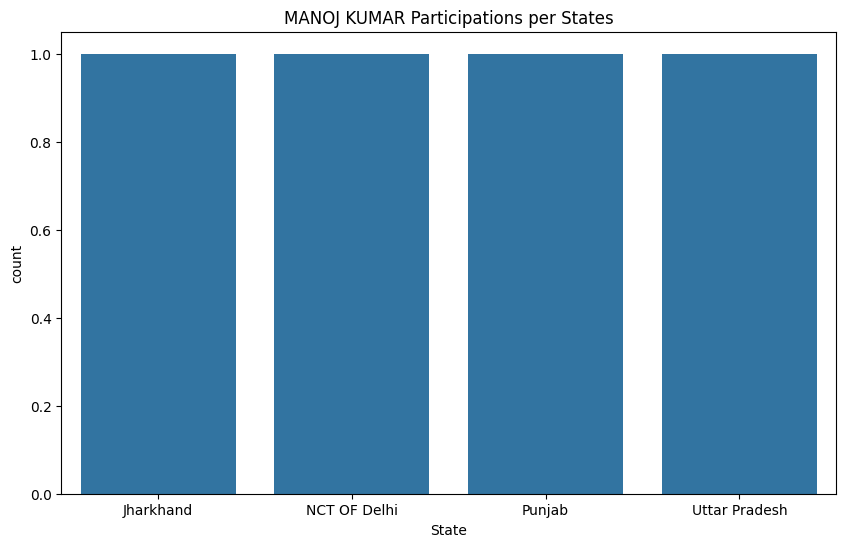

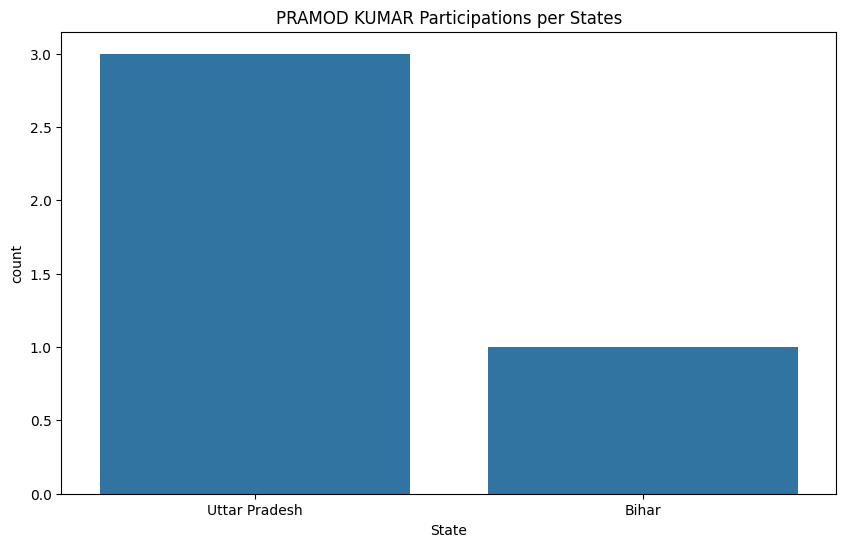

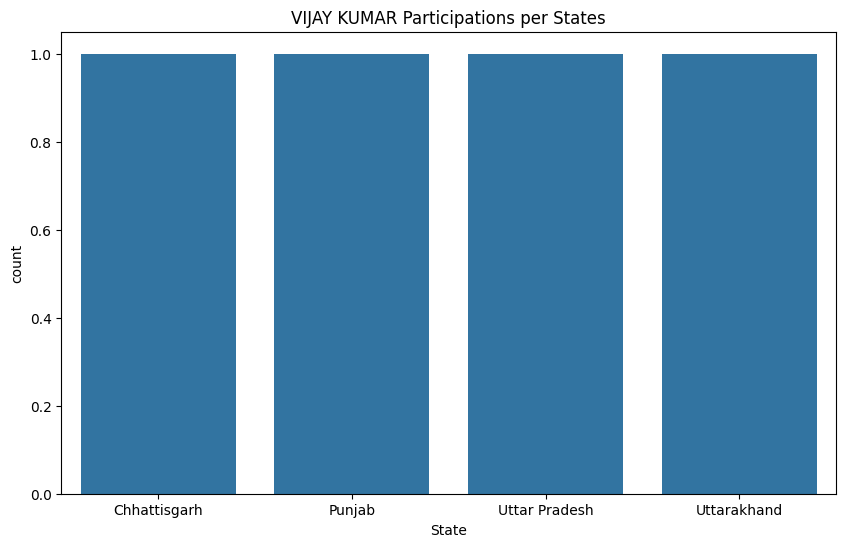

In [39]:
multiple_independent_candidates = independent_candidates.value_counts('Candidate').head()

for candidate in multiple_independent_candidates.index:
    row = independent_candidates[independent_candidates['Candidate'] == candidate].value_counts('State')
    plt.figure(figsize=(10,6))
    plt.title(f"{candidate} Participations per States")
    sns.barplot(x=row.index, y=row)
    plt.show()

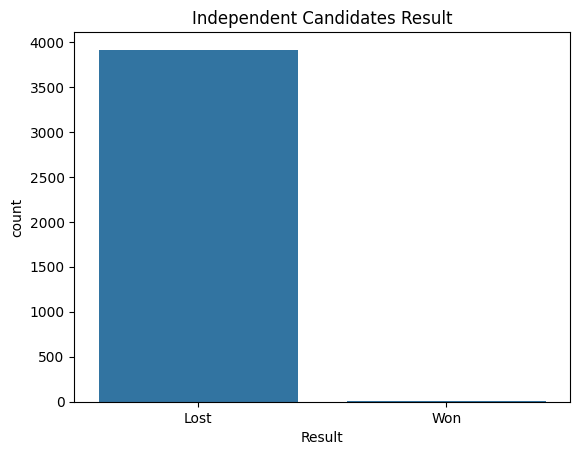

In [40]:
independent_candidates_result = independent_candidates.value_counts('Result')

plt.title('Independent Candidates Result')
sns.barplot(x=independent_candidates_result.index, y=independent_candidates_result)
plt.show()